In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train1 = pd.read_csv("/content/drive/MyDrive/Deep Learning/XY_train_0.85.csv")

In [4]:
test1 = pd.read_csv("/content/drive/MyDrive/Deep Learning/XY_test_0.85.csv")

In [5]:
Y_train1 = train1.iloc[:, 5]
X_train1 = train1.iloc[:, 0:5]
Y_test1 = test1.iloc[:, 5]
X_test1 = test1.iloc[:, 0:5]

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

In [7]:
from sklearn.model_selection import RandomizedSearchCV

In [8]:
from sklearn import ensemble
from xgboost.sklearn import XGBRegressor

In [9]:
model_xgb = XGBRegressor()

In [10]:
n_estimators = [1000, 1500, 2000, 2500, 3000]
learning_rate = [0.05, 1, 0.15, 0.2, 0.25, 0.3]
min_child_weight= [1, 5, 10]
gamma= [0.01, 0.015, 0.02, 0.025, 0.03]
subsample= [0.3, 0.4, 0.5, 0.6, 0.7]
colsample_bytree= [0.1, 0.2, 0.3, 0.4, 0.5]
max_depth= [2, 3, 4, 5]
        

In [11]:
# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators,
    "learning_rate":learning_rate,
    'max_depth': max_depth,
    'min_child_weight': min_child_weight,
    "gamma":gamma,
    "subsample":subsample,
    'colsample_bytree': colsample_bytree,
    'max_depth': max_depth}

In [12]:
# Set up the random search with 5-fold cross validation
random_cv = RandomizedSearchCV(estimator=model_xgb,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=100,
            scoring = 'r2',
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [13]:
#XGBoost_best= random_cv.fit(X_train1,Y_train1)

In [14]:
#XGBoost_best.best_estimator_

In [15]:
#XGBoost_best.best_score_

In [16]:
from sklearn import ensemble
model1 = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.025,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=5, missing=None, n_estimators=3000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.7, verbosity=1)

In [17]:
model1.fit(X_train1,Y_train1)

[12:58:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.025,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=5, missing=None, n_estimators=3000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.7, verbosity=1)

In [18]:
model1.score(X_train1,Y_train1)

0.9973211636219228

In [19]:
model1.score(X_test1,Y_test1)

0.9676987940250047

In [20]:
y_pred = model1.predict(X_test1)

In [21]:
count = 0
for i in range(len(Y_test1)):
  if abs(y_pred[i]-Y_test1.iloc[i]) <=0.5:
    count += 1

count

54

In [22]:
import sklearn.metrics as sm
y_test = Y_test1
y_test_pred = y_pred
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, y_pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, y_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Regressor model performance:
Mean absolute error(MAE) = 0.36
Mean squared error(MSE) = 0.22
Median absolute error = 0.28
Explain variance score = 0.97
R2 score = 0.97


In [23]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model1, X = X_train1, y = Y_train1, cv = 5)
print("Accuracy:{:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation:{:.2f} %".format(accuracies.std()*100))

[12:58:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:58:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:58:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:58:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:58:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy:92.63 %
Standard Deviation:1.53 %


In [24]:
# evaluate a logistic regression model using repeated k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# create model
model = model1
# evaluate model
scores = cross_val_score(model, X= X_train1, y= Y_train1, scoring = "r2", cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores),std(scores)))

Accuracy: 0.924 (0.015)


In [25]:
print(min(scores))

0.8939685908755035


In [26]:
print(mean(scores))

0.9244242685991819


In [27]:
print(scores)

[0.94482843 0.9386884  0.89396859 0.93223307 0.90048031 0.92327066
 0.93255265 0.92876168 0.90528312 0.92593756 0.9353748  0.90760524
 0.93294415 0.93427063 0.93016473]


In [28]:
#data2 = pd.read_csv("/content/drive/MyDrive/Deep Learning/Results.csv", index_col= "ID")
#data2.head()

In [29]:
#data2 = pd.DataFrame(y_test_pred, y_test)

In [30]:
#data2.to_csv('/content/drive/MyDrive/Deep Learning/Results1.csv')

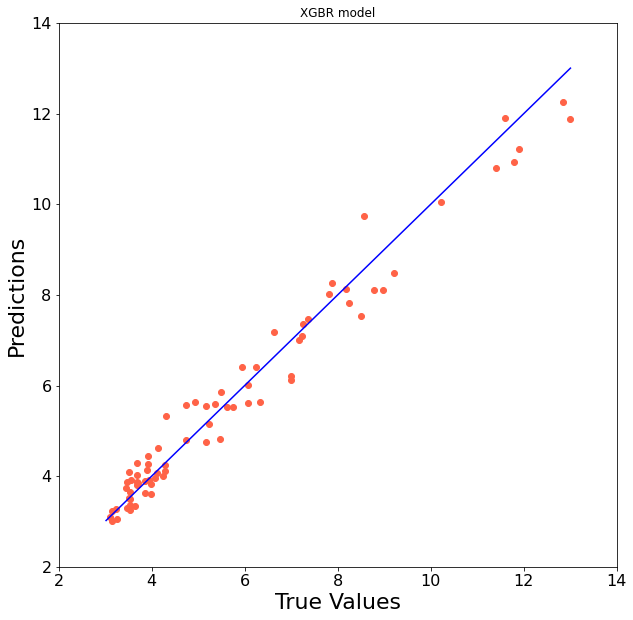

<Figure size 432x288 with 0 Axes>

In [31]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='tomato')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=22)
plt.ylabel('Predictions', fontsize=22)
#plt.axis('equal')
plt.title("XGBR model")
plt.xlim(2, 14)
plt.ylim(2, 14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
plt.savefig("XGBR_model.png")